In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import random
import warnings
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm
from sklearn.exceptions import ConvergenceWarning

try:
    from myst_nb import glue
except ImportError:
    glue = lambda *args, **kwargs: _
# 一部の警告を無視
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", FutureWarning)
os.environ["PYTHONWARNINGS"] = "ignore"

In [33]:


# 画像を読み込む
pixel=30
N,M=9,9
K=400
Xs=[]
Ys=[]
for id in range(K):
    for id2 in range(3):
        img=cv2.imread(f'./training_data/flip/flip_{id}_{id2}.png')
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # 処理が完了した画像を保存するなどの操作を行うことができます
        # plt.imshow(img, cmap='gray')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # plt.imshow(img, cmap='gray')
        # print(img.shape)
        img_rs=cv2.resize(gray,(pixel,pixel),interpolation=cv2.INTER_AREA)
        # img_rs=cv2.bitwise_not(img_rs)
        x_i=img_rs.reshape(1, -1)
        # print(x_i.shape)
        y=id2==0
        Xs.append(x_i)
        Ys.append(y)
            
Xs=pd.DataFrame(np.array(Xs).reshape(K*3,-1))
Ys=pd.DataFrame(np.array(Ys).reshape(K*3,-1),columns=['label'])
print(Xs.shape,Ys.shape)
df=pd.concat([Ys,Xs],axis=1)
# df=df.loc[df.iloc[:,0]!=0]
df.shape


(1200, 900) (1200, 1)


(1200, 901)

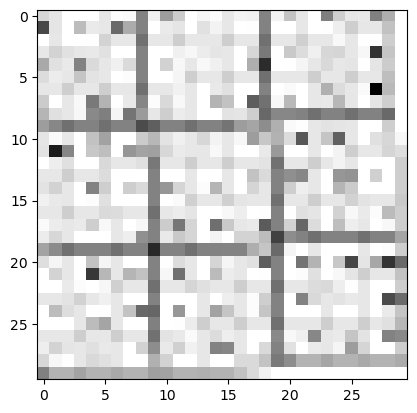

In [34]:
img=cv2.imread(f'./training_data/flip_wb/flip_0_1.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # 処理が完了した画像を保存するなどの操作を行うことができます
# plt.imshow(img, cmap='gray')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.imshow(img, cmap='gray')
# print(img.shape)
img_rs=cv2.resize(gray,(pixel,pixel),interpolation=cv2.INTER_AREA)
# img_rs=cv2.bitwise_not(img_rs)
plt.imshow(img_rs, cmap='gray')

In [35]:
df

,label,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
0,True,177,232,245,241,255,255,241,255,255,...,0,0,0,0,0,0,0,0,0,0
1,False,232,240,255,255,255,241,253,252,184,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,236,255,255,241,255,255,241,245,232,177
3,True,177,212,212,201,212,212,201,207,191,...,189,203,225,214,227,227,214,227,187,201
4,False,189,227,227,214,227,227,214,227,227,...,177,212,212,201,212,212,201,212,210,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,False,241,243,250,255,255,241,255,247,184,...,0,0,0,0,0,0,0,0,0,0
1196,False,0,0,0,0,0,0,0,0,0,...,235,240,255,241,255,255,239,242,230,177
1197,True,177,230,242,239,255,255,241,255,255,...,0,0,0,0,0,0,0,0,0,0
1198,False,241,243,250,255,255,241,253,191,166,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
X_org, y_org = df.iloc[:,1:], df.iloc[:,0]
X_org = np.array(X_org / 255.0, dtype="double")
y_org = np.array(y_org, dtype="uint8")
X, X_test, y, y_test = model_selection.train_test_split(
    X_org, y_org,test_size=0.2, shuffle=True,random_state=42
)
# # use partial data 
# # n_samples = 10000  
# # X, y = X[:n_samples], y[:n_samples]
# # X_test, y_test = X_test[:n_samples], y_test[:n_samples]

# スケーリングパラメータの計算
scaler = StandardScaler()
scaler.fit(X)

# データのスケーリング
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# 訓練モデルの構築
lr_params = {"tol": 1.0e-3, "max_iter": 5000, "solver": "lbfgs"}
# clf = LogisticRegression(**lr_params)
# clf = RandomForestClassifier()
# clf= KNeighborsClassifier(n_neighbors=20)
# clf=MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, alpha=0.0001)
# 訓練モデルの構築
# svc_kernel="rbf"
svc_kernel="linear"
# clf = SVC(kernel="linear", C=1.0, tol=1.0e-2, max_iter=-1)
clf = SVC(kernel=svc_kernel, C=1.0, tol=1.0e-2, max_iter=-1,probability=True)
clf.fit(X, y)

# # # # 訓練モデルの構築 (弱識別器にロジスティック回帰を使用)
# weak = LogisticRegression(**lr_params)
# clf = AdaBoostClassifier(estimator=weak, n_estimators=100)

# clf=GradientBoostingClassifier(n_estimators=10)
# clf.fit(X, y)
acc_train = 100.0 * clf.score(X, y)
print("logis_acc_train", acc_train)

# テストデータに対する識別精度の計算
acc_test = 100.0 * clf.score(X_test, y_test)
print("logis_acc_test", acc_test)

logis_acc_train 100.0
logis_acc_test 100.0


In [37]:
# clf.predict(X_test)

In [42]:
###############################
### save model and scaler
###############################
import pickle
name=clf.__class__.__name__[:4]
print(name)
if name=="SVC":
    name+=svc_kernel
with open(f'./pickle/{name}_flip_clf.pickle', mode='wb') as fp:
    pickle.dump(clf, fp)
with open(f'./pickle/{name}_flip_scaler.pickle', mode='wb') as fp:
    pickle.dump(scaler, fp)

# reload
# scaler = pd.read_pickle('./pickle/rf_scaler.pickle')
# clf=pd.read_pickle('./pickle/rf_clf.pickle')
# X_test = scaler.transform(X_test)
# acc_test = 100.0 * clf.score(X_test, y_test)
# print("rf_acc_test", acc_test)

SVC


In [39]:
import recog_l2
import os
# ディレクトリ内のファイルを取得する
dir_path = "./data/level2/"
files = os.listdir(dir_path)
# jpgファイルのみを取得する
jpg_files = [os.path.splitext(f)[0] for f in files if f.endswith('.jpg')]

# ファイル名を表示する
for f in jpg_files:
    print(f)
# jpg_files
# pixel=60
file="sample"
# problem=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",arc_epsilon=5e-2)
# img=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",arc_epsilon=5e-2,ret_img=1,erase_line=0)
# plt.imshow(img)
# problem

sample
sudoku_00026
sudoku_00027
sudoku_00028
sudoku_00030
sudoku_00031


In [40]:
for file in jpg_files:
        # pixel=60
        problem=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",n_close=1,n_open=2,prior_close=1,trim_percentage=0.008,mean_white_axis=0,arc_epsilon=5e-2,erase_line=0,otsu_times=1.2,clf_f=clf,scaler_f=scaler,pixel_f=pixel)
        with open(f'./{dir_path}{file}.txt', 'r') as f:
            matrix_data = [[int(num) for num in line.split()] for line in f]
        # print matrix data by row
        # for row in matrix_data:
        #     print(row)
        matrix_array = np.array(matrix_data)
        validate=[matrix_data[i][j]==problem[i][j] for i in range(9) for j in range(9)]
        proba=sum(validate)/len(validate)
        zeros=np.sum(np.array(matrix_data) == 0)
        nonzeros=81-zeros
        failed=81-proba*81
        print(f"{file}","{:.4f}".format(proba),failed,f"failure rate: {failed/nonzeros:.2f}")
        # probas.append(proba)

sample 1.0000 0.0 failure rate: 0.00
sudoku_00026 1.0000 0.0 failure rate: 0.00
sudoku_00027 0.9630 3.0 failure rate: 0.10
sudoku_00028 1.0000 0.0 failure rate: 0.00
sudoku_00030 1.0000 0.0 failure rate: 0.00
sudoku_00031 0.9877 1.0 failure rate: 0.04


In [41]:
# import recog
# import recog_l2
# # cropped=recog.recognize(path="./data/level_1.jpg")
# # cropped=recog_l2.recognize(path="./data/level_1.jpg")
# # cropped=recog_l2.recognize(path="./data/level_2.jpg")
# # cropped=recog_l2.recognize(path="./data/level2/sample.jpg",ret_img=True,erase_line=0)
# cropped=recog_l2.recognize(path="./data/level2/sudoku_00028.jpg",ret_img=True,erase_line=0,clf_f_name="KNei")
# # cropped=recog_l2.recognize(path="./data/level_3.jpg")
# plt.imshow(cropped, cmap='gray')
# # cropped_rs=cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
# cropped_rs=cropped
# cropped_rs = cv2.resize(cropped_rs, (pixel,pixel),interpolation=cv2.INTER_AREA)
# # cropped_rs=cv2.bitwise_not(cropped_rs)
# cropped_region_=cropped_rs.copy()
# plt.imshow(cropped_rs, cmap='gray')

# # digit=cropped_rs.reshape(1,-1)
# # 真ん中だとOK
# for i in range(3):
#     flip_p=np.rot90(np.array(cropped_rs),i-1)
    
#     flip=flip_p.reshape(1,-1)/255.0
#     flip=scaler.transform(flip)
#     try:
#         print(clf.predict(flip),clf.predict_proba(flip))
#     except:
#         print(clf.predict(flip))
#     plt.imshow(flip_p, cmap='gray')
#     plt.show()